# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Дерево решений


**Общая информация**

**Срок сдачи:** до 27 марта 2018, 06:00   
**Штраф за опоздание:** -2 балла после 06:00 27 марта, -4 балла после 06:00 3 апреля, -6 баллов после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла   


Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush
Необходимо в slack создать таск в приватный чат:   
/todo Фамилия Имя *ссылка на гитхаб* @alkhamush   
Пример:   
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw2.ipynb @alkhamush   

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Разберитесь в коде MyDecisionTreeClassifier, который уже частично реализован. В комментариях, где написано "Что делает этот блок кода?", ответьте на этот вопрос. Допишите код там, где написано "Ваш код". Ваша реализация дерева должна работать по точности не хуже DecisionTreeClassifier из sklearn. Точность проверяется на wine и Speed Dating Data.

###### Задание 2 (2 балла)
Добиться скорости работы на fit сравнимой со sklearn wine и Speed Dating Data. 
Для этого используем numpy. 

###### Задание 3 (2 балла)
Продемонстрируйте умение работать с Pipeline на данных Speed Dating Data и DecisionTreeClassifier. Нужно в pipeline произвести все необходимые преобразования данных и в конце обучить модель. Задание реализуйте под пунктом Задание 3 (уже написано ниже)

###### Задание 4 (2 балла)
Добавьте функционал, который определяет значения feature importance. Выведите 10 главных фичей под пунктом Задание 4 (уже написано ниже) для MyDecisionTreeClassifier и DecisionTreeClassifier так, чтобы сразу были видны выводы и по MyDecisionTreeClassifier, и по DecisionTreeClassifier. Используем данные Speed Dating Data.

###### Задание 5 (2 балла)
С помощью GridSearchCV или RandomSearchCV подберите наиболее оптимальные параметры для случайного леса (Выберете 2-3 параметра). Используем данные Speed Dating Data. Задание реализуйте под пунктом Задание 5 (уже написано ниже)


**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from math import sqrt
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
#%load_ext pycodestyle_magic

In [5]:
import platform
platform.python_version()

'2.7.12'

In [35]:
x = np.array([12.2,12.25,12.25,12.36,12.45,12.51,12.58,12.6,12.64,12.7,12.77,12.79
,12.81,12.82,12.84,12.85,12.86,12.87,12.88,12.93,12.96,13.08,13.11,13.16
,13.17,13.17,13.23,13.27,13.32,13.36,13.4,13.4,13.45,13.48,13.49,13.5
,13.52,13.71,13.73,13.78,13.84,13.88,14.16,14.34])
y = np.array([2,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
,1,1,1,1,1,1,1])


sorted_idx = x.argsort()

sorted_x = x[sorted_idx]
sorted_y = y[sorted_idx]

splitted_sorted_y = sorted_y[2:-2]
r_border_ids = np.where(splitted_sorted_y[:-1] != splitted_sorted_y[1:])[0] + (2 + 1)
# индексы элементов с переходным значением целевой переменной

eq_el_count = r_border_ids - np.append([2], r_border_ids[:-1])


print r_border_ids
print np.append([2], r_border_ids[:-1])
print eq_el_count
print "----"
class_number = np.unique(y).shape[0]
one_hot_code = np.zeros((r_border_ids.shape[0], class_number)) # создаем матрицу, которая преобразует наш признак x
# в два бинарных признака
one_hot_code
print np.arange(r_border_ids.shape[0])
print sorted_y[r_border_ids - 1]
one_hot_code[np.arange(r_border_ids.shape[0]), sorted_y[r_border_ids - 1]] = 1
print one_hot_code
class_increments = one_hot_code * eq_el_count.reshape(-1, 1)
print "class inc"
print class_increments
print "---"
class_increments[0] = class_increments[0] + np.bincount(sorted_y[:2], minlength=class_number)
print class_increments
print "==================="
l_class_count = np.cumsum(class_increments, axis=0)        
r_class_count = np.bincount(sorted_y, minlength=class_number) - l_class_count
print "bin y-sor"
print np.bincount(sorted_y, minlength=class_number)
print l_class_count
print 
print r_class_count
print '---'
l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
r_sizes = sorted_y.shape[0] - l_sizes

print l_sizes
print r_sizes

[ 9 12 19 20]
[ 2  9 12 19]
[7 3 7 1]
----
[0 1 2 3]
[1 2 1 0]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
class inc
[[0. 7. 0.]
 [0. 0. 3.]
 [0. 7. 0.]
 [1. 0. 0.]]
---
[[0. 8. 1.]
 [0. 0. 3.]
 [0. 7. 0.]
 [1. 0. 0.]]
bin y-sor
[ 1 39  4]
[[ 0.  8.  1.]
 [ 0.  8.  4.]
 [ 0. 15.  4.]
 [ 1. 15.  4.]]

[[ 1. 31.  3.]
 [ 1. 31.  0.]
 [ 1. 24.  0.]
 [ 0. 24.  0.]]
---
[[ 9]
 [12]
 [19]
 [20]]
[[35]
 [32]
 [25]
 [24]]


In [585]:
y=np.array([[1,2,10],[2,2,2],[3,3,3]])
def dd(x,y,z):
    print x
    return x

np.apply_along_axis(dd,0,y,1,3)


[1 2 3]
[2 2 3]
[10  2  3]


array([[ 1,  2, 10],
       [ 2,  2,  2],
       [ 3,  3,  3]])

In [38]:
print l_class_count 
print 
print l_sizes
print 
print r_class_count 
print r_sizes
print
print (l_class_count / l_sizes)
print
print (r_class_count / r_sizes)
v =1- np.sum( l_class_count**2 / l_sizes + r_class_count**2 / r_sizes, axis=1)
print v
print np.argmin(v)

[[ 0.  8.  1.]
 [ 0.  8.  4.]
 [ 0. 15.  4.]
 [ 1. 15.  4.]]

[[ 9]
 [12]
 [19]
 [20]]

[[ 1. 31.  3.]
 [ 1. 31.  0.]
 [ 1. 24.  0.]
 [ 0. 24.  0.]]
[[35]
 [32]
 [25]
 [24]]

[[0.         0.88888889 0.11111111]
 [0.         0.66666667 0.33333333]
 [0.         0.78947368 0.21052632]
 [0.05       0.75       0.2       ]]

[[0.02857143 0.88571429 0.08571429]
 [0.03125    0.96875    0.        ]
 [0.04       0.96       0.        ]
 [0.         1.         0.        ]]
[-33.96507937 -35.72916667 -34.76421053 -35.1       ]
1


In [4]:
y=np.array([1,2,3,4,1,2,2,2,3,3,3,1,2])

print y
splitted_sorted_y=y[2:-2]
print splitted_sorted_y
print splitted_sorted_y[:-1]
print splitted_sorted_y[1:]
print splitted_sorted_y[:-1] != splitted_sorted_y[1:]
z=np.where(splitted_sorted_y[:-1] != splitted_sorted_y[1:])[0]+3
print np.where(splitted_sorted_y[:-1] != splitted_sorted_y[1:])[0]+3
z.shape[0]

[1 2 3 4 1 2 2 2 3 3 3 1 2]
[3 4 1 2 2 2 3 3 3]
[3 4 1 2 2 2 3 3]
[4 1 2 2 2 3 3 3]
[ True  True  True False False  True False False]
[3 4 5 8]


4

In [5]:
print np.append([2], z[:-1])
z- np.append([2], z[:-1])

[2 3 4 5]


array([1, 1, 1, 3])

In [ ]:
        print class_increments
        print "---"
        print sorted_y[:self.min_samples_split]
        print '---'
        print np.bincount(sorted_y[:self.min_samples_split], minlength=class_number)

In [1248]:
import ipdb

In [29]:
#%%pycodestyle


class MyDecisionTreeClassifier:
    NON_LEAF_TYPE = 0
    LEAF_TYPE = 1

    def __init__(self, min_samples_split=2, max_depth=None, sufficient_share=1.0, criterion='gini', max_features=None):
        self.tree = dict()
        if min_samples_split < 3:
            self.min_samples_split = min_samples_split
        else:
            self.min_samples_split = min_samples_split / 2 - 1
        self.max_depth = max_depth
        self.sufficient_share = sufficient_share
        self.num_class = -1
        self.feature_importances_ = None
        if criterion == 'gini':
            self.G_function = self.__gini
        elif criterion == 'entropy':
            self.G_function = self.__entropy
        elif criterion == 'misclass':
            self.G_function = self.__misclass
        else:
            print('invalid criterion name')
            raise

        if max_features == 'sqrt':
            self.get_feature_ids = self.__get_feature_ids_sqrt
        elif max_features == 'log2':
            self.get_feature_ids = self.__get_feature_ids_log2
        elif max_features == None:
            self.get_feature_ids = self.__get_feature_ids_N
        else:
            print('invalid max_features name')
            raise

    def __gini(self, l_c, l_s, r_c, r_s):
        l_s = l_s.astype('float')
        r_s = r_s.astype('float')
        print '---0'
        print 1 - np.sum((l_c / l_s)**2, axis=1) - np.sum((r_c / r_s)**2, axis=1)
        return 1 - np.sum((l_c / l_s)**2, axis=1) - np.sum((r_c / r_s)**2, axis=1)
    
    def __entropy(self, l_c, l_s, r_c, r_s):
        return -np.sum(l_c * np.log1p(l_c / l_s) + r_c * np.log1p(r_c / r_s),axis=1).reshape(-1,1) / (l_s + r_s)


    def __misclass(self, l_c, l_s, r_c, r_s):
        return 1 - (np.max(l_c, axis=1).reshape(-1,1) + np.max(r_c, axis=1).reshape(-1,1)) / (l_s + r_s)

    def __get_feature_ids_sqrt(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[:int(sqrt(n_feature))]
        
    def __get_feature_ids_log2(self, n_feature):
        feature_ids = range(n_feature)
        np.random.shuffle(feature_ids)
        return feature_ids[:int(log2(n_feature))]

    def __get_feature_ids_N(self, n_feature):
        return range(n_feature)
    
    def __sort_samples(self, x, y):
        sorted_idx = x.argsort()
        return x[sorted_idx], y[sorted_idx]

    def __div_samples(self, x, y, feature_id, threshold):
        left_mask = x[:, feature_id] > threshold
        right_mask = ~left_mask
        return x[left_mask], x[right_mask], y[left_mask], y[right_mask]

    def __find_threshold(self, x, y):
        # возвращает отсортированный х и соответствующие ему у
        sorted_x, sorted_y = self.__sort_samples(x, y)
        # количество уникальных элементов в у, соответственно кол-во классов в ноде
        #class_number = np.unique(y).shape[0]
        class_number = self.num_class
        cut = self.min_samples_split / 2 - 1
        #print class_number == self.num_class
        # Что делает этот блок кода?
        # min_samples_split - минимальное количество семплов для разделения ноды  
        # splitted_sorted_y - массив с отсортированными у от которого взяли середину
        # (без min_samples_split слева и справа)
        # если элементов меньше или равно, чем min_samples_split, то он вернет пустой массив
        splitted_sorted_y = sorted_y[self.min_samples_split:-self.min_samples_split]
        # r_border_ids - это массив с индексами элементов из splitted_sorted_y 
        # которые отличаются от предыдущего элемента
        r_border_ids = np.where(splitted_sorted_y[:-1] != splitted_sorted_y[1:])[0] + (self.min_samples_split + 1)
        
        # выходим из функции и возвращаем порог = бесконечности
        if len(r_border_ids) == 0:
            #print "inf======"
            return float('+inf'), None
        #print '777'
        # Что делает этот блок кода?
        # Cтавит единицы там, где индексы идут подряд 
        eq_el_count = r_border_ids - np.append([self.min_samples_split], r_border_ids[:-1])
        # создает матрицу размером NхМ, N - сколько раз целевая переменная меняется на х_sorted
        #                               M - кол-во различных значений которые принимает целевая переменная в y
        one_hot_code = np.zeros((r_border_ids.shape[0], class_number))
        # Cтавим 1 в каждой строчке на место, которое соответствует значению целевой переменной, 
        # которе у нее было до смены этого значения
        one_hot_code[np.arange(r_border_ids.shape[0]), sorted_y[r_border_ids - 1]] = 1
        
        # В этой матрице на тех местах, где в one_hot_code стоят единицы,
        # стоит количество одинаковых, подряд идущих элементов между сменой целевой переменной
        class_increments = one_hot_code * eq_el_count.reshape(-1, 1)
        
        # В первую строчку в места соответствующих значений целевой переменной 
        # прибавляем их количество из отрезанного ранее куска 
        class_increments[0] = class_increments[0] + np.bincount(sorted_y[:self.min_samples_split],
                                                                minlength=class_number)
        
        # Считаем сколько семплов попадут в правый и в левый потомок
        # при этом строчки отвечают за индекс разбиения (через r_border_ids)
        # а столбцы за значение целевой переменной
        l_class_count = np.cumsum(class_increments, axis=0)        
        r_class_count = np.bincount(y, minlength=class_number) - l_class_count
        # количество семплов в левом и правом потомке для каждого разбиения
        l_sizes = r_border_ids.reshape(l_class_count.shape[0], 1)
        r_sizes = sorted_y.shape[0] - l_sizes

        # находим impurity для всех разбиений
        gs = self.G_function(l_class_count, l_sizes, r_class_count, r_sizes)
        # получаем индекс разбиения с минимальным impurity
        idx = np.argmin(gs)
    
        # получаем индекс последнего (крайнего) элемента, который удовлетиворяет
        # выбранному разбиению
        left_el_id = l_sizes[idx][0]
        # возвращаем impurity и threshold
        return gs[idx], (sorted_x[left_el_id-1] + sorted_x[left_el_id]) / 2.0

    def __fit_node(self, x, y, node_id, depth, pred_f=-1): 
        # Здесь х и у это оставшиеся(их меньше, чем в изначальном трейне)
        # import ipdb; ipdb.set_trace()
        if depth == self.max_depth or x.shape[0] < self.min_samples_split or np.unique(y).shape[0] == 1:
            self.__create_leaf(y, node_id)
            return              
        features_threshold = np.zeros(x.shape[1])
        features_impurity = np.zeros(x.shape[1])
        
        for feature_id in self.get_feature_ids(x.shape[1]):
            features_impurity[feature_id], features_threshold[feature_id] = self.__find_threshold(x[:,feature_id],y)
        
        best_feture_id = np.argmin(features_impurity)
        
        if np.isnan(features_threshold[best_feture_id]):
            self.__create_leaf(y, node_id)
            return
        
        x_l, x_r, y_l, y_r = self.__div_samples(x, y, best_feture_id, features_threshold[best_feture_id])
        
        if y_l.shape[0] == 0 or y_r.shape[0] == 0:
            self.__create_leaf(y,node_id)
            return
        
        self.tree[node_id] = (self.NON_LEAF_TYPE,best_feture_id,features_threshold[best_feture_id])
        self.__fit_node(x_l, y_l, 2 * node_id + 1, depth + 1)
        self.__fit_node(x_r, y_r, 2 * node_id + 2, depth + 1)
        
    def __create_leaf(self, y, node_id):  
        counts = np.bincount(y, minlength=self.num_class)
        probs = counts / np.sum(counts).astype('float')
        self.tree[node_id] = (self.LEAF_TYPE, np.argmax(counts), probs)
        
        
    
    def fit(self, x, y):
        self.num_class = np.unique(y).size
        self.__fit_node(x, y, 0, 0) 
        print self.tree

    def __predict_class(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                return self.__predict_class(x, 2 * node_id + 1)
            else:
                return self.__predict_class(x, 2 * node_id + 2)
        else:
            return node[1]

    def __predict_probs(self, x, node_id):
        node = self.tree[node_id]
        if node[0] == self.__class__.NON_LEAF_TYPE:
            _, feature_id, threshold = node
            if x[feature_id] > threshold:
                return self.__predict_probs(x, 2 * node_id + 1)
            else:
                return self.__predict_probs(x, 2 * node_id + 2)
        else:
            return node[2]
        
    def predict(self, X):
        return np.array([self.__predict_class(x, 0) for x in X])
    
    def predict_probs(self, X):
        return np.array([self.__predict_probs(x, 0) for x in X])

    def fit_predict(self, x_train, y_train, predicted_x):
        self.fit(x_train, y_train)
        return self.predict(predicted_x)
    def score(self, x,y_test):
        return f1_score(y_pred=my_clf.predict(x), y_true=y_test, average='macro')
    def tree(self):
        tr = np.copy(self.tree)
        return tr

In [30]:
my_clf = MyDecisionTreeClassifier(min_samples_split=2)
clf = DecisionTreeClassifier(min_samples_split=2)

In [31]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, stratify=wine.target)

## Проверка скорости работы на wine

In [32]:
from time import time

In [33]:
%time clf.fit(X_train, y_train)


CPU times: user 1.77 ms, sys: 0 ns, total: 1.77 ms
Wall time: 1.41 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
%time my_clf.fit(X_train, y_train)

---0
[-0.34171258 -0.27540899 -0.28183521 -0.17974143 -0.21805556 -0.18116312
 -0.2374281  -0.20838188 -0.21558672 -0.18938188 -0.20498491 -0.14054185
 -0.17726875 -0.16007443 -0.19127632 -0.13851852 -0.11680263 -0.09872094
 -0.0790574  -0.06599283 -0.10582259 -0.088125   -0.10273603 -0.05464554
 -0.04862222 -0.06469523 -0.06331624 -0.04918084 -0.04949097 -0.03607217
 -0.03774654 -0.01240932 -0.01513672  0.01984871  0.00064444 -0.00347007
  0.0074738   0.00230734  0.01303058  0.00676074  0.01731476  0.00987216
 -0.01346986 -0.0230565  -0.01268099 -0.02375235 -0.01346372 -0.02617727
  0.00422313 -0.02672558 -0.00638889 -0.03982049 -0.03006556 -0.07486575
 -0.04525115 -0.07336426 -0.04271839 -0.0762378  -0.04373114 -0.0847871
 -0.04940719 -0.10173469 -0.04716435 -0.21731879 -0.09979853 -0.34381852]
---0
[-0.33574316 -0.2191358  -0.23140372 -0.14858923 -0.16486227 -0.0927873
 -0.11979369 -0.06452261 -0.08247831  0.0348306  -0.01013605  0.06557293
  0.03332568  0.1014638   0.09426375  0.10

## Проверка качества работы на wine

In [19]:
t = {0: (0, 6, 0.975), 1: (0, 12, 985.0), 2: (1, 2, ([0., 0., 1.])), 3: (1, 0, ([1., 0., 0.])), 4: (0, 11, 1.53), 9: (0, 1, 4.145), 10: (1, 2, ([0., 0., 1.])), 19: (1, 1, ([0., 1., 0.])), 20: (0, 4, 131.0), 180187: (1, 0, ([1., 0., 0.])), 41: (1, 1, ([0., 1., 0.])), 42: (0, 12, 900.5), 173: (1, 0, ([1., 0., 0.])), 174: (0, 3, 25.5), 360377: (1, 2, ([0.        , 0.33333333, 0.66666667])), 360378: (1, 1, ([0., 1., 0.])), 701: (1, 0, ([1., 0., 0.])), 702: (0, 4, 103.0), 45045: (1, 1, ([0., 1., 0.])), 85: (1, 0, ([1., 0., 0.])), 86: (0, 4, 121.5), 5629: (0, 5, 2.815), 180188: (0, 4, 88.5), 349: (1, 1, ([0., 1., 0.])), 350: (0, 4, 114.0), 5630: (1, 1, ([0., 1., 0.])), 90093: (0, 6, 2.34), 90094: (1, 1, ([0., 1., 0.])), 2813: (1, 1, ([0., 1., 0.])), 1406: (0, 7, 0.53), 45046: (0, 1, 1.665), 22521: (1, 1, ([0., 1., 0.])), 22522: (0, 10, 1.12), 11259: (1, 1, ([0., 1., 0.])), 11260: (0, 6, 2.6399999999999997), 1405: (1, 1, ([0., 1., 0.])), 2814: (0, 3, 17.15)}

In [20]:
t.keys()

[0,
 1,
 2,
 3,
 4,
 9,
 10,
 1406,
 90093,
 22522,
 2813,
 19,
 20,
 85,
 86,
 22521,
 180187,
 180188,
 349,
 350,
 2814,
 5630,
 90094,
 41,
 42,
 173,
 174,
 5629,
 1405,
 45045,
 45046,
 360377,
 360378,
 11259,
 11260,
 701,
 702]

In [21]:
f1_score(y_pred=clf.predict(X_test), y_true=y_test, average='macro')

0.9440559440559441

In [22]:
f1_score(y_pred=my_clf.predict(X_test), y_true=y_test, average='macro')

0.9487179487179486

## Подготовка данных Speed Dating Data 

(3599, 63)


(400, 63)

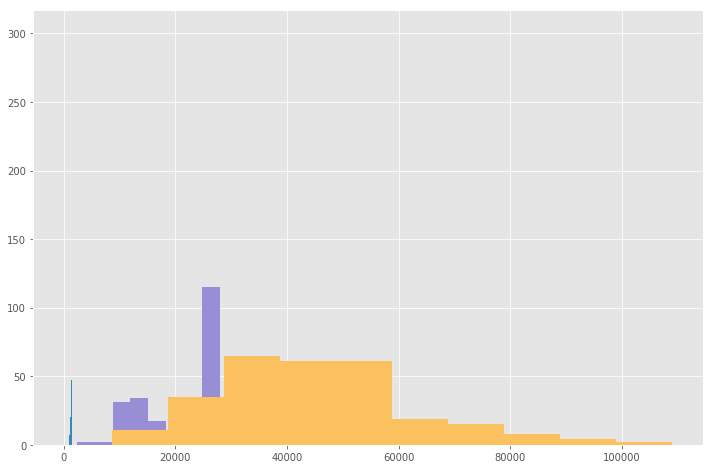

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}

plt.rc('font', **font)


df = pd.read_csv('speed-dating-experiment/Speed Dating Data.csv')

df.shape

df = df.iloc[:, :97]

df.iid.nunique()

df = df.drop(['id'], axis=1)
df = df.drop(['idg'], axis=1)

df.drop_duplicates(subset=['iid']).gender.value_counts()


df.drop_duplicates(subset=['iid']).condtn.value_counts()
df = df.drop(['condtn'], axis=1)
df.wave.unique()

df = df.drop(['round'], axis=1)
df = df.drop(['position', 'positin1'], axis=1)
df = df.drop(['order'], axis=1)
df = df.drop(['partner'], axis=1)
df = df.drop(['age_o', 'race_o', 'pf_o_att', 
              'pf_o_sin', 'pf_o_int',
              'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
              'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o',
              'amb_o', 'shar_o', 'like_o', 'prob_o','met_o'], 
             axis=1)
df.drop_duplicates(subset=['iid']).age.hist(bins=20)
df.drop_duplicates('iid').age.isnull().sum()
df = df.dropna(subset=['age'])

df.field_cd.isnull().sum()

df.loc[:, 'field_cd'] = df.loc[:, 'field_cd'].fillna(19)

df = df.drop(['field'], axis=1)
df.undergra.value_counts().head()
df = df.drop(['undergra'], axis=1)

df.mn_sat.value_counts().head()

df.loc[:, 'mn_sat'] = df.loc[:, 'mn_sat'].str.replace(',', '').astype(np.float)

df.drop_duplicates('iid').mn_sat.hist()

df.drop_duplicates('iid').mn_sat.isnull().sum()
df.loc[:, 'mn_sat'] = df.mn_sat.fillna(-999)
df.tuition.value_counts().head()

df.loc[:, 'tuition'] = df.loc[:, 'tuition'].str.replace(',', '').astype(np.float)

df.drop_duplicates('iid').tuition.hist()

df.drop_duplicates('iid').tuition.isnull().sum()

# Что будем делать?
df.loc[:, 'tuition'] = df.tuition.fillna(-999)

#### race:
# * Black/African American=1
# * European/Caucasian-American=2
# * Latino/Hispanic American=3
# * Asian/Pacific Islander/Asian-American=4
# * Native American=5
# * Other=6


# Ну тут вы уже сами знаете как быть
df.drop_duplicates('iid').race.value_counts()

df.drop_duplicates('iid').age.isnull().sum()
# df = df.dropna(subset=['race'])

#### imprace:
# How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?

#### imprelig:
#  How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?


df.drop_duplicates('iid').race.hist()

df.drop_duplicates('iid').imprace.isnull().sum()

df.drop_duplicates('iid').imprelig.isnull().sum()

# Что делать?

df = df.dropna(subset=['imprelig', 'imprace'])

#### from:
# Where are you from originally (before coming to Columbia)? 

#### zipcode:
# What was the zip code of the area where you grew up? 

# Выкидываем

df = df.drop(['from', 'zipcode'], axis=1)

#### income

df.loc[:, 'income'] = df.loc[:, 'income'].str.replace(',', '').astype(np.float)

df.drop_duplicates('iid').loc[:, 'income'].hist()

df.drop_duplicates('iid').loc[:, 'income'].isnull().sum()

# df = df.drop(['income'], axis=1)
df.loc[:, 'income'] = df.loc[:, 'income'].fillna(-999)
df.loc[:, 'date'].isnull().sum()
df = df.dropna(subset=['date'])

df.career_c.isnull().sum()

df.loc[:, 'career_c'] = df.loc[:, 'career_c'].fillna(18)

df = df.drop(['career'], axis=1)
df.loc[:, ['sports','tvsports','exercise','dining','museums','art','hiking','gaming',
       'clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga']
      ].isnull().sum()

df = df.drop(['sports','tvsports','exercise','dining','museums','art','hiking','gaming',
       'clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga'], axis=1)
df.drop_duplicates('iid').exphappy.isnull().sum()

df.drop_duplicates('iid').expnum.isnull().sum()

df = df.drop(['expnum'], axis=1)
feat = ['iid', 'wave', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

temp = df.drop_duplicates(subset=['iid', 'wave']).loc[:, feat]

temp.loc[:, 'totalsum'] = temp.iloc[:, 2:].sum(axis=1)

idx = ((temp.wave < 6) | (temp.wave > 9)) & (temp.totalsum < 99)

temp.loc[idx, ]

idx = ((temp.wave >= 6) & (temp.wave <= 9))

temp.loc[idx, ]

# Ну понятно, надо чутка подредактировать исходные признаки и в бой

df.loc[:, 'temp_totalsum'] = df.loc[:, ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].sum(axis=1)

df.loc[:, ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']] = \
(df.loc[:, ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].T/df.loc[:, 'temp_totalsum'].T).T * 100


feat = ['iid', 'wave', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']

temp = df.drop_duplicates(subset=['iid', 'wave']).loc[:, feat]

temp.loc[:, 'totalsum'] = temp.iloc[:, 2:].sum(axis=1)

idx = ((temp.wave < 6) | (temp.wave > 9)) & (temp.totalsum < 90) & (temp.totalsum != 0)

temp.loc[idx, ]

idx = ((temp.wave >= 6) & (temp.wave <= 9))

temp.loc[idx, ]

df.loc[:, 'temp_totalsum'] = df.loc[:, ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].sum(axis=1)

df.loc[:, ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']] = \
(df.loc[:, ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].T/df.loc[:, 'temp_totalsum'].T).T * 100

df = df.drop(['temp_totalsum'], axis=1)

# Признаки `attr4` и `attr5` пока выбросим

for i in [4, 5]:
    feat = ['attr{}_1'.format(i), 'sinc{}_1'.format(i), 
            'intel{}_1'.format(i), 'fun{}_1'.format(i), 
            'amb{}_1'.format(i), 'shar{}_1'.format(i)]
    
    if i != 4:
        feat.remove('shar{}_1'.format(i))
    
    df = df.drop(feat, axis=1)

# Теперь создалим таблицу с мужчинами, таблицу с женщинами с сджоиним их

df = df.drop(['wave'], axis=1)

df_male = df.query('gender == 1').drop_duplicates(subset=['iid', 'pid'])\
                                 .drop(['gender'], axis=1)\
                                 .dropna()
df_female = df.query('gender == 0').drop_duplicates(subset=['iid'])\
                                   .drop(['gender', 'match', 'int_corr', 'samerace'], axis=1)\
                                   .dropna()
        
df_female.columns = df_female.columns + '_f'

from sklearn.model_selection import train_test_split

df_pair = df_male.join(df_female.set_index('iid_f'), on = 'pid', how = 'inner')
df_pair = df_pair.drop(['iid', 'pid'], axis = 1)
df_pair.head()

from sklearn.model_selection import train_test_split

X = df_pair.iloc[:, 1:].values
y = df_pair.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

print X_train.shape

X_test.shape

## Проверка скорости работы на Speed Dating Data 

In [24]:
my_clf = MyDecisionTreeClassifier(min_samples_split=2)

clf = DecisionTreeClassifier()

In [25]:
%time clf.fit(X_train, y_train)

CPU times: user 79.4 ms, sys: 4.14 ms, total: 83.6 ms
Wall time: 82.9 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
%time my_clf.fit(X_train, y_train)

[[0.765625   0.015625  ]
 [0.60493827 0.04938272]
 [0.73469388 0.02040816]
 ...
 [0.70137697 0.02641193]
 [0.70183313 0.0263235 ]
 [0.70144132 0.02639945]]
[[0.70259035 0.0261771 ]
 [0.70298182 0.0261016 ]
 [0.70260402 0.02617446]
 ...
 [0.91840278 0.00173611]
 [0.89197531 0.00308642]
 [1.         0.        ]]
---0
[1.51001745 1.38340441 1.48388052 1.3544119  1.50372819 1.43160929
 1.47878722 1.42641004 1.43169431 1.40953458 1.41976921 1.39987054
 1.4475253  1.42992996 1.43369317 1.41745906 1.45123722 1.4365991
 1.44263514 1.42898132 1.47272509 1.46057964 1.48691741 1.47591011
 1.48662855 1.47631126 1.49562108 1.47696622 1.48300219 1.47427254
 1.48154599 1.47323713 1.48156262 1.4736606  1.48029018 1.47273732
 1.47786899 1.47061779 1.47438371 1.46739493 1.47818273 1.47153704
 1.47497432 1.46855134 1.47737428 1.47123082 1.47441793 1.46846694
 1.48796153 1.48240196 1.48942675 1.48408328 1.49316467 1.48805535
 1.49725438 1.4923721  1.50022862 1.49554664 1.49963631 1.4950947
 1.49576897 1.4

[1.35401105 1.2493269  1.32104195 1.26077152 1.28501622 1.2497774
 1.32137057 1.28540664 1.30010265 1.27336042 1.30992498 1.28579869
 1.29629787 1.26206974 1.2699588  1.25770543 1.36133341 1.34386044
 1.34967411 1.33404694 1.34498528 1.31806684 1.33276901 1.31021958
 1.35604614 1.34509717 1.34884682 1.33867089 1.34587505 1.32747539
 1.385304   1.37627898 1.39655998 1.37973423 1.39359424 1.3857392
 1.39863396 1.38389983 1.39200581 1.38508146 1.42088166 1.41425009
 1.4190358  1.41264283 1.41883171 1.41266671 1.42721207 1.42129259
 1.42677401 1.42105185 1.42239792 1.4114539  1.41544943 1.41022058
 1.41283647 1.40775967 1.41161387 1.40668385 1.40795078 1.40315705
 1.40813625 1.40347649 1.42526964 1.42077376 1.42396139 1.41958131
 1.42063229 1.41635721 1.42050139 1.41633508 1.41937901 1.41531414
 1.42026855 1.41242882 1.41724907 1.41346562 1.41535608 1.41165666
 1.417203   1.41005289 1.42146238 1.41132413 1.41878859 1.41555117
 1.42189959 1.41873449 1.42028295 1.41717844 1.42023315 1.417190

[1.35401105 1.24016388 1.39681883 1.32170072 1.37452901 1.34578913
 1.44585399 1.39866775 1.45519951 1.43587149 1.49437652 1.47813392
 1.4909464  1.47605517 1.49678315 1.4833188  1.49374605 1.48122954
 1.53759079 1.52746166 1.53457272 1.52502728 1.53184859 1.52282573
 1.52937671 1.52082439 1.52190457 1.51362643 1.51581072 1.50782273
 1.51109218 1.50340391 1.50449569 1.48978843 1.49313006 1.47932308
 1.48045232 1.46740156 1.4696904  1.4634498  1.46905784 1.46304268
 1.46632589 1.46049783 1.46688137 1.46126295 1.46334106 1.45254464
 1.454627   1.44943734 1.45652919 1.45151599 1.4525059  1.44761377
 1.45152863 1.44677376 1.45154131 1.44692326 1.44786264 1.4346148
 1.43556345 1.43134064 1.44575794 1.43770962 1.45317427 1.4493514
 1.45537462 1.45165756 1.45601572 1.44882879 1.45026456 1.44677221
 1.45306891 1.44967002 1.46387938 1.45741192 1.45863653 1.45548483
 1.45609585 1.45299607 1.45360728 1.44755618 1.44817038 1.44521714
 1.44765446 1.44475702 1.44715715 1.44431372 1.444909   1.442110

 1.73135262]
[[0.25       0.25      ]
 [0.44444444 0.11111111]
 [0.32653061 0.18367347]
 ...
 [0.70573222 0.02557482]
 [0.70641033 0.02544593]
 [0.70601441 0.02552114]]
[[0.70688166 0.02535657]
 [0.70673145 0.02538503]
 [0.7071281  0.02530992]
 ...
 [0.85207101 0.00591716]
 [0.5625     0.0625    ]
 [1.         0.        ]]
---0
[1.23223822 1.28767203 1.2426421  1.26362713 1.23887195 1.43438498
 1.39196377 1.46800489 1.43447958 1.45403819 1.42534667 1.49053907
 1.46715022 1.50621714 1.48641061 1.51936245 1.50235695 1.50481872
 1.48887846 1.5096904  1.49538176 1.50584015 1.47996067 1.48206806
 1.47007716 1.48799553 1.47694888 1.47883087 1.46828405 1.47204137
 1.46199611 1.48598633 1.47676729 1.48295866 1.4741783  1.48588998
 1.47761233 1.48179828 1.47385567 1.47661287 1.46154639 1.4785761
 1.4716106  1.47527748 1.46202145 1.4656722  1.45935703 1.46056412
 1.45443221 1.46491929 1.4423304  1.44910564 1.43874028 1.45253784
 1.44763013 1.44964693 1.44486482 1.4458684  1.44120097 1.45183684
 

[[0.11111111 0.44444444]
 [0.8464     0.0064    ]
 [0.72565158 0.02194787]
 ...
 [0.70467119 0.02577728]
 [0.70641033 0.02544593]
 [0.70601441 0.02552114]]
[[0.70695671 0.02534236]
 [0.70529682 0.02565779]
 [0.70609309 0.02550618]
 ...
 [0.92729767 0.00137174]
 [0.5625     0.0625    ]
 [1.         0.        ]]
---0
[1.28785462 1.58375461 1.47919872 1.51254224 1.47449872 1.48659444
 1.42534667 1.4591911  1.43457479 1.47124708 1.44997648 1.47988725
 1.46120694 1.46462671 1.44735489 1.45077749 1.43476706 1.44150639
 1.42667301 1.45134032 1.42500806 1.42790146 1.41589295 1.44247548
 1.43134913 1.4362125  1.42568367 1.44173591 1.43184746 1.43402989
 1.42460271 1.45605164 1.44731719 1.45258034 1.44423119 1.4651982
 1.45738573 1.45888976 1.45135161 1.45434383 1.44708155 1.45577201
 1.44882357 1.45437899 1.44769391 1.45041448 1.44395158 1.44664238
 1.44038978 1.44172618 1.43566409 1.4369969  1.43111741 1.4337623
 1.4280643  1.43324348 1.42772952 1.43762424 1.43230721 1.4335047
 1.42329579 1.43

[1.63121672 1.55126128 1.5588644  1.49598482 1.54559904 1.50030402
 1.51254224 1.47449872 1.51696471 1.48654875 1.51975286 1.49444529
 1.50189053 1.47907795 1.48282162 1.44274795 1.44663138 1.42897103
 1.45077749 1.43476706 1.45108115 1.43639468 1.44554121 1.43189287
 1.44620417 1.43353546 1.43627822 1.41306076 1.41849595 1.40785304
 1.41314189 1.40307734 1.41074142 1.40120644 1.43515919 1.42621835
 1.43617622 1.42767593 1.42960676 1.42145831 1.4289978  1.4212082
 1.44197008 1.43459744 1.43781973 1.43072127 1.45023364 1.4435111
 1.46078108 1.45441441 1.45690884 1.45074224 1.46266154 1.45677072
 1.46239763 1.45671007 1.46108147 1.45557466 1.45665434 1.45129131
 1.45450407 1.43925115 1.44139382 1.4365631  1.44385382 1.43917498
 1.44996487 1.44545259 1.4491939  1.43629267 1.43907594 1.43496907
 1.43950784 1.43550581 1.44250232 1.43861185 1.44282852 1.43903329
 1.45910267 1.4519281  1.45336375 1.44645185 1.44859704 1.44194181
 1.44265535 1.43941609 1.44012861 1.4369475  1.44046679 1.431279

## Проверка качества работы на Speed Dating Data

In [27]:
f1_score(y_pred=clf.predict(X_test), y_true=y_test, average='macro') 

0.5798949737434358

In [28]:
f1_score(y_pred=my_clf.predict(X_test), y_true=y_test, average='macro') 

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.45054945054945056

## Задание 3

## Задание 4

In [710]:
X_train.shape


(3599, 63)

In [645]:
range(5,21,5)

[5, 10, 15, 20]

In [719]:
clf = DecisionTreeClassifier()
param_dist = {"max_depth": range(2,20),
              "min_samples_split": range(2,20),
              "max_features": ["sqrt", None],
              "criterion": ["gini", "entropy"]}
n_iter_search = 20
grid = GridSearchCV(clf, param_grid=param_dist)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_features': ['sqrt', None], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [811]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=18,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Задание 5

In [717]:
clf = MyDecisionTreeClassifier()
param_dist = {"max_depth": range(2,20),
              "min_samples_split": range(2,20),
              "max_features": ["sqrt", None]
              "criterion": ["gini", "entropy"]}
n_iter_search = 20
random_search = GridSearchCV(clf, param_grid=param_dist)
random_search.fit(X_train,y_train)

SyntaxError: invalid syntax (<ipython-input-717-f74a12566ea3>, line 5)

In [663]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)